In [1]:
%load_ext autoreload
%autoreload 2

from tweedejaars_project import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import *

df = load_df()
# temp = df[110000:] # 110240 target is false maar is wel twoside

df['residual_load'] = df['forecast_demand'] - df['forecast_solar'] - df['forecast_wind']
df['dispatch_diff'] = df['upward_dispatch_published'] - df['downward_dispatch_published']
df['igcc_diff'] = df['igcc_contribution_up_published'] - df['igcc_contribution_down_published']

2024-06-13 10:33:44.059 | INFO     | tweedejaars_project.config:<module>:11 - PROJ_ROOT path is: /home/nub/tweedejaars_project


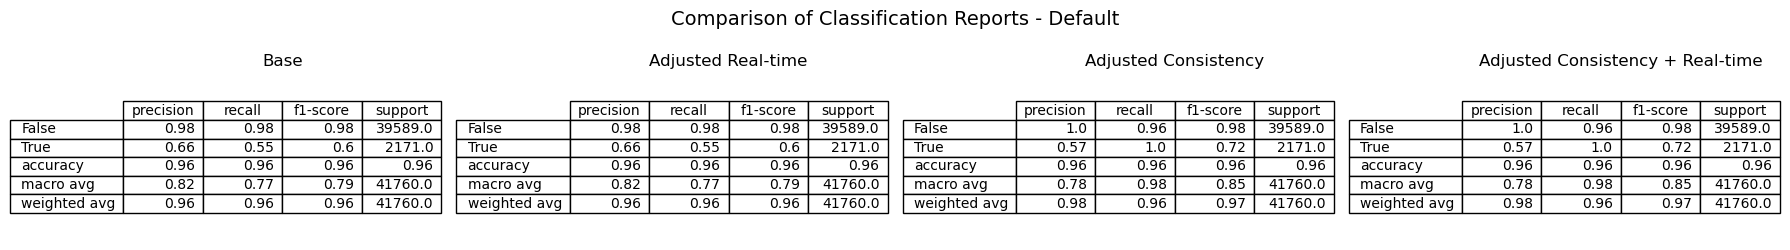

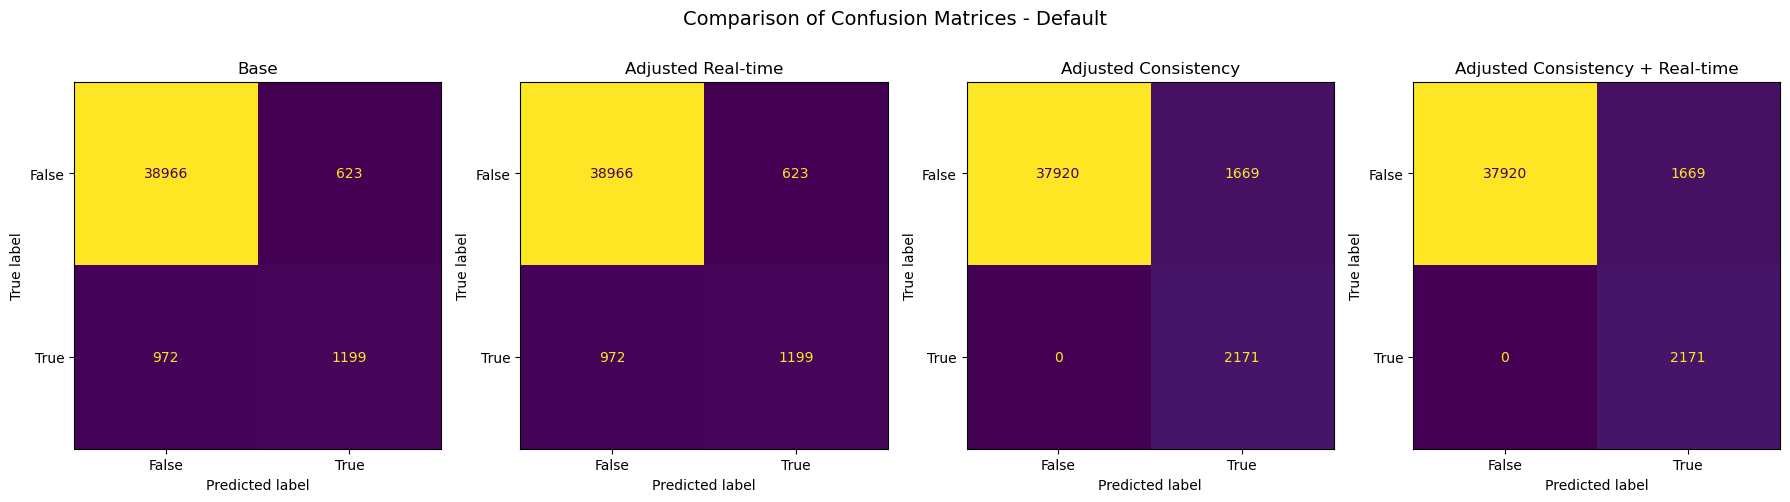

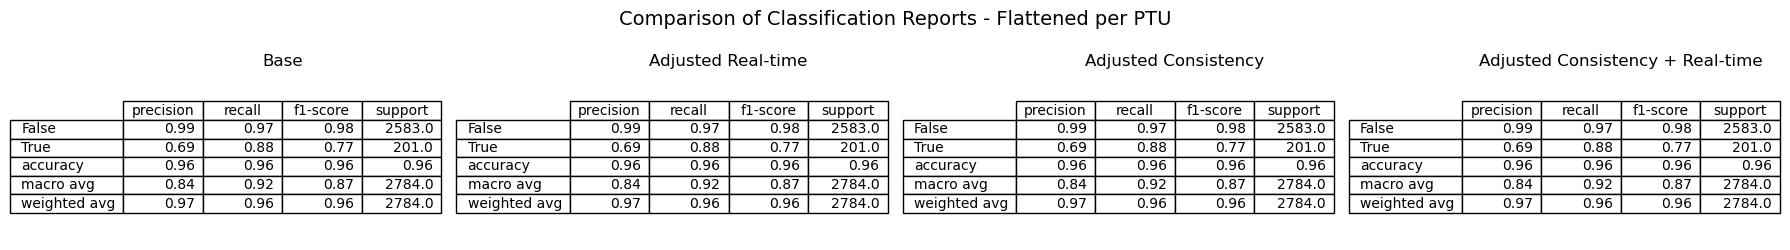

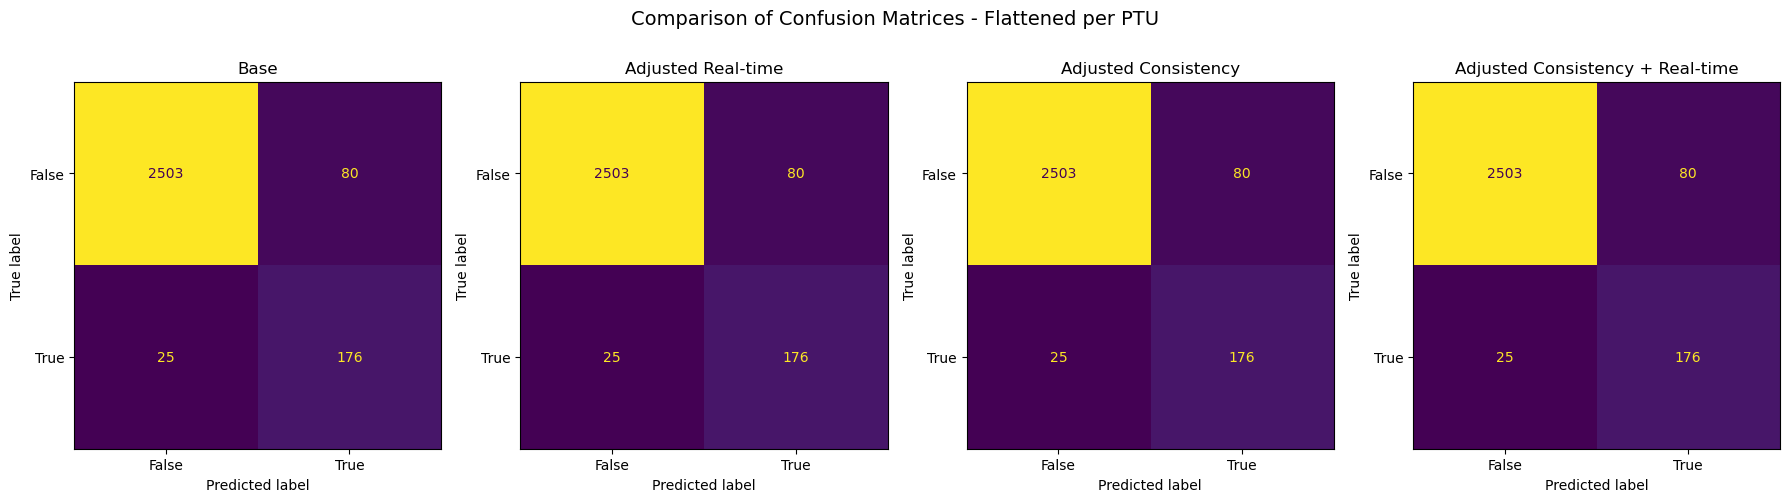

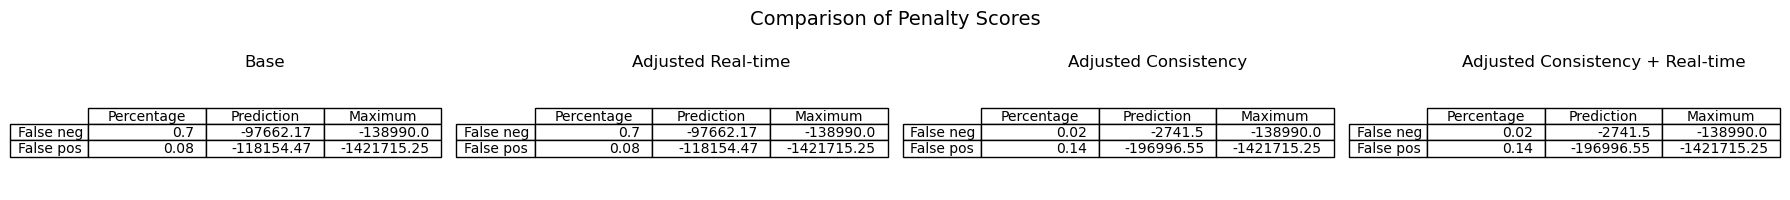

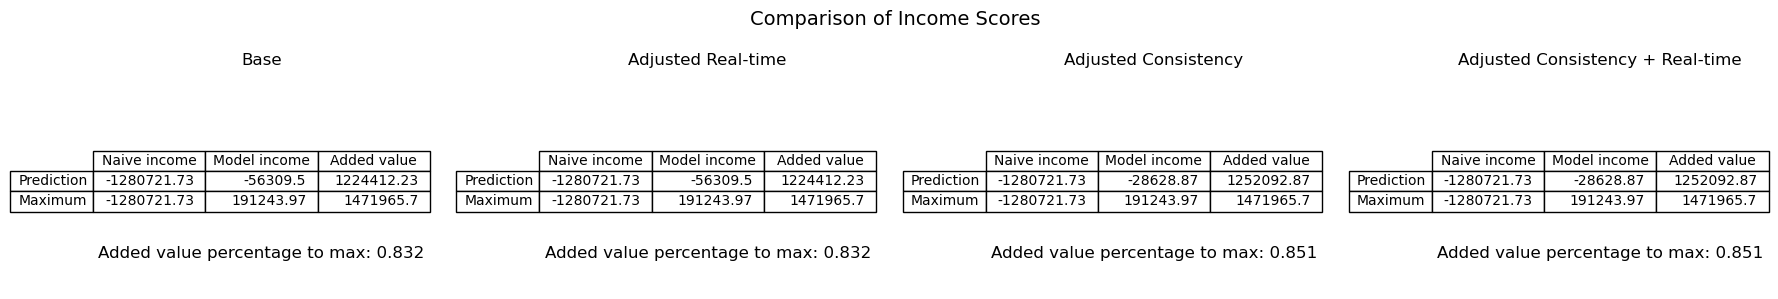

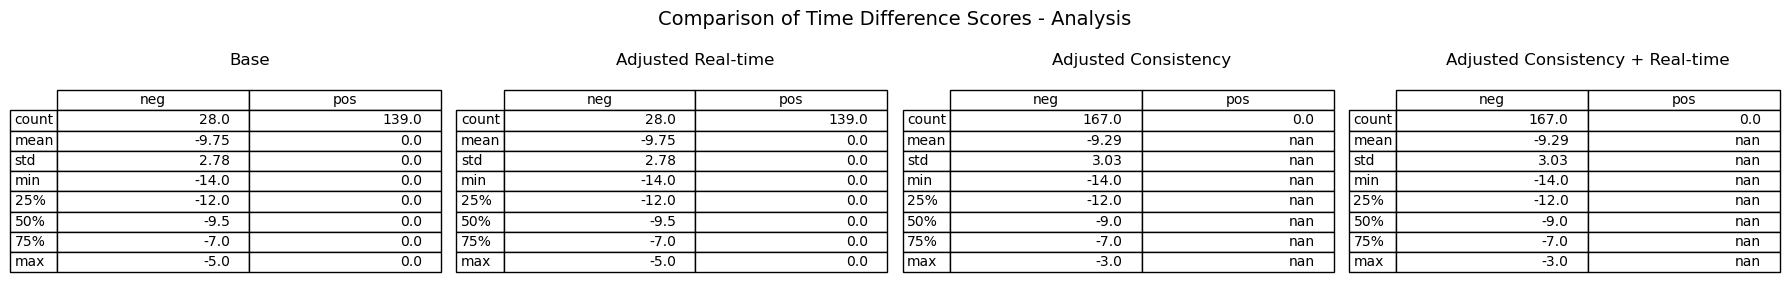

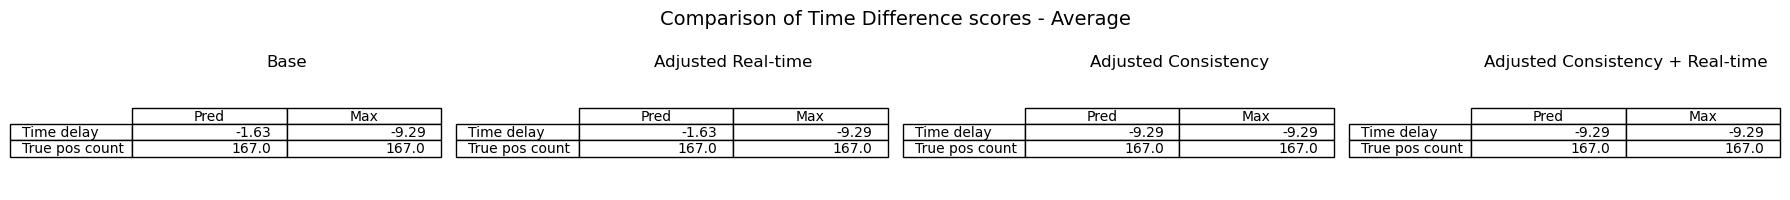

In [2]:
features = [
    'import_capacity',
    'min_price_published',
    'mid_price_published',
    'max_price_published',
    'min_ptu_price_known',
    'max_ptu_price_known',
    'settlement_price_bestguess',
    'time_since_last_two_sided',
    'two_sided_daily_count',
    'PTU',
    'naive_strategy_action',
    'forecast_wind',
    'forecast_solar',
    'forecast_demand',
    'target_two_sided_ptu_realtime'
]
splits = get_splits(df, features, "fix_two_sided_ptu", return_dict_pair=False)
# m = RandomForestClassifier(n_estimators=50)
# m = HistGradientBoostingRegressor(loss='poisson')
m = HistGradientBoostingClassifier()
m.fit(splits['train'][0], splits['train'][1])
p = m.predict(splits['valid'][0])
p = p > 0.5
p1 = recast_pred(p)
show_metrics_adjusted(splits['valid'][3], p1, version="fix")

# train on fix test on target
# split target and two side
# only check ptu start with neg or naive=true, for train or metric

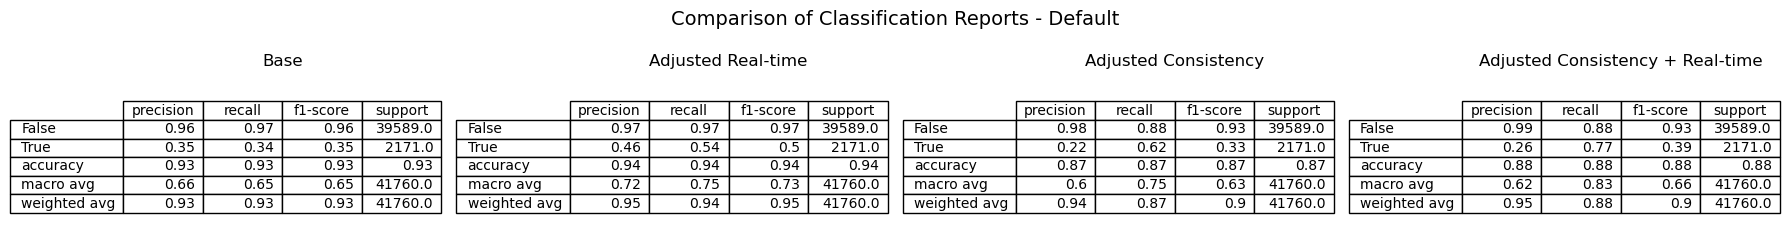

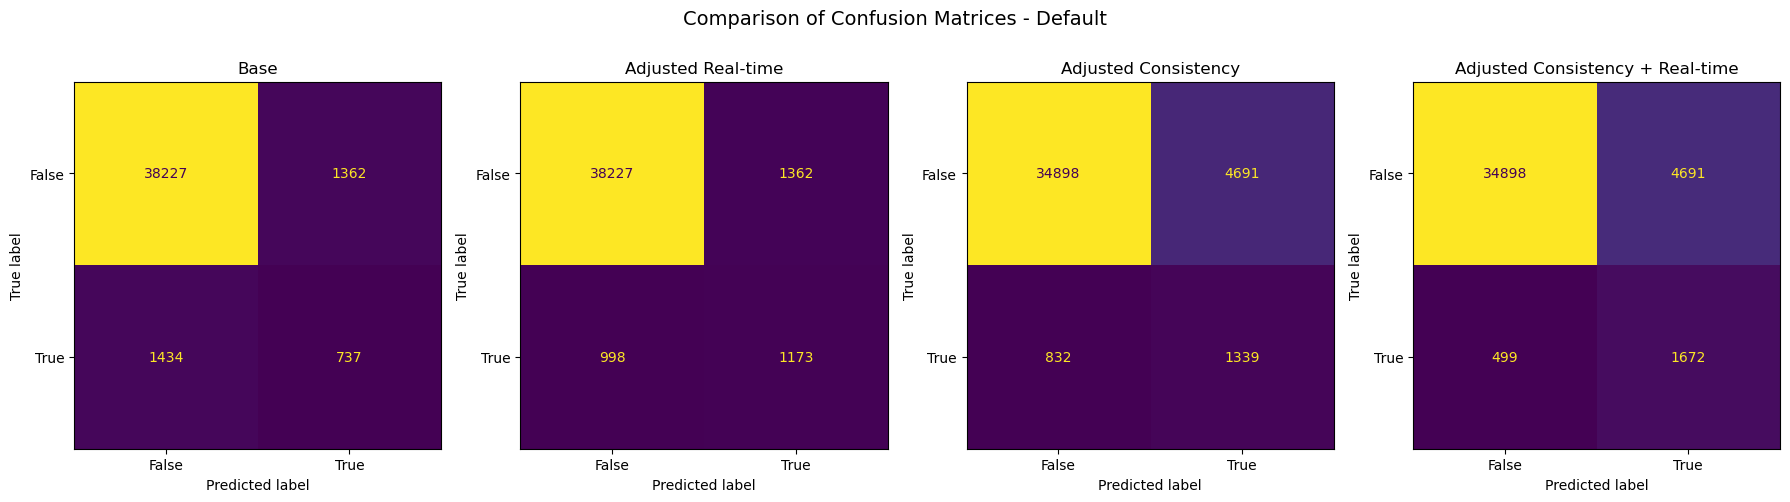

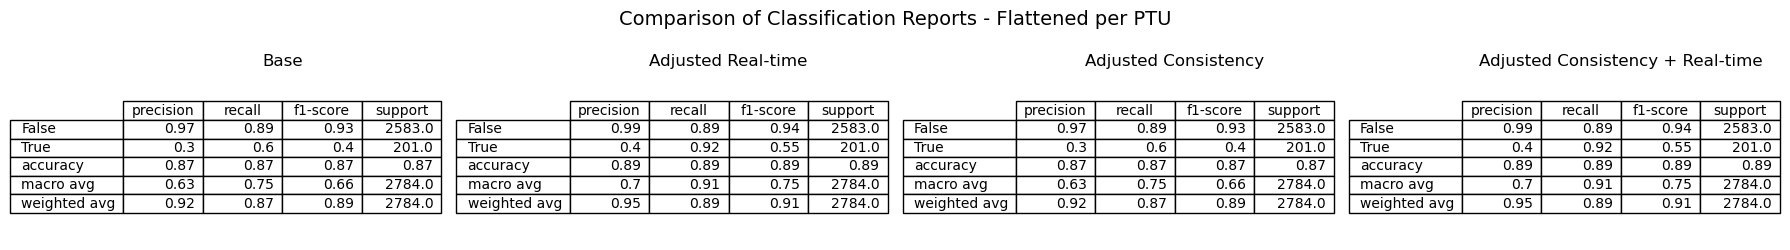

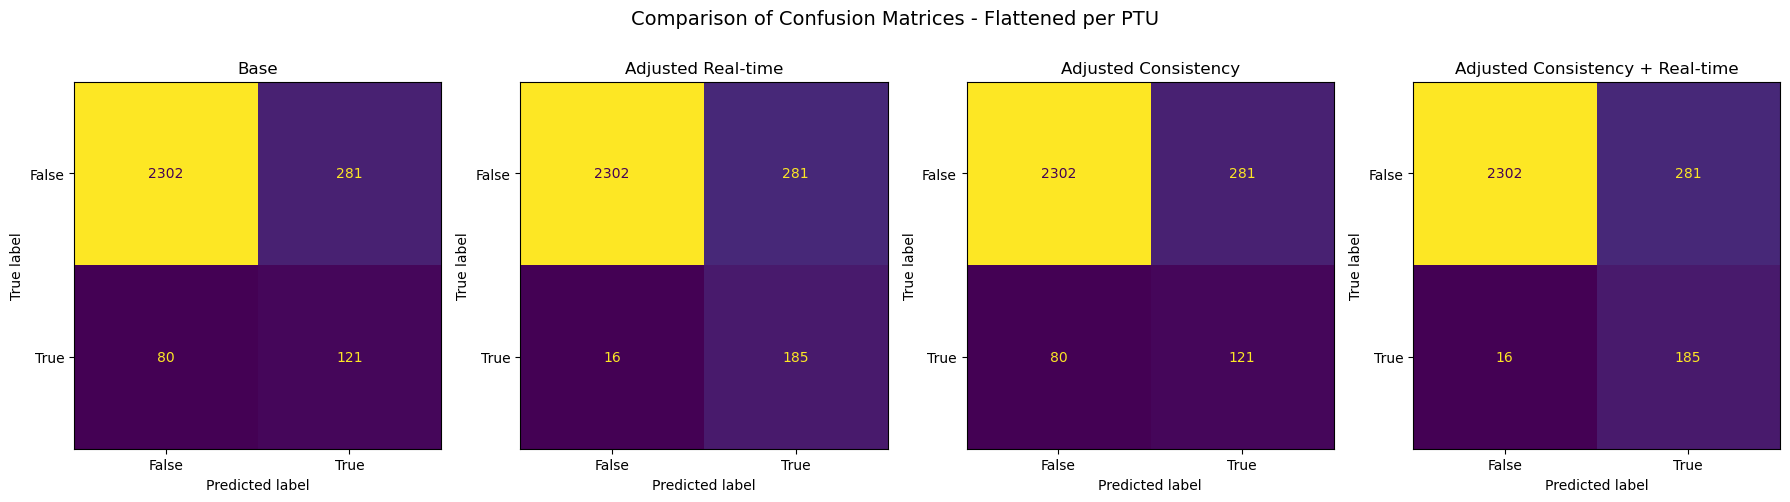

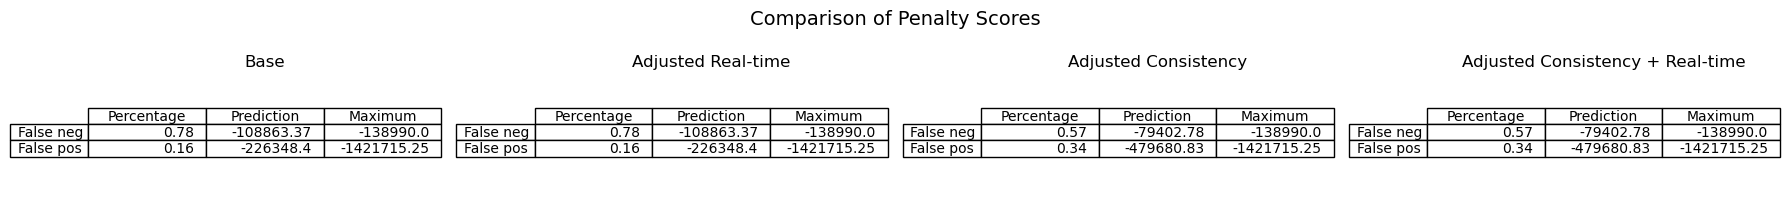

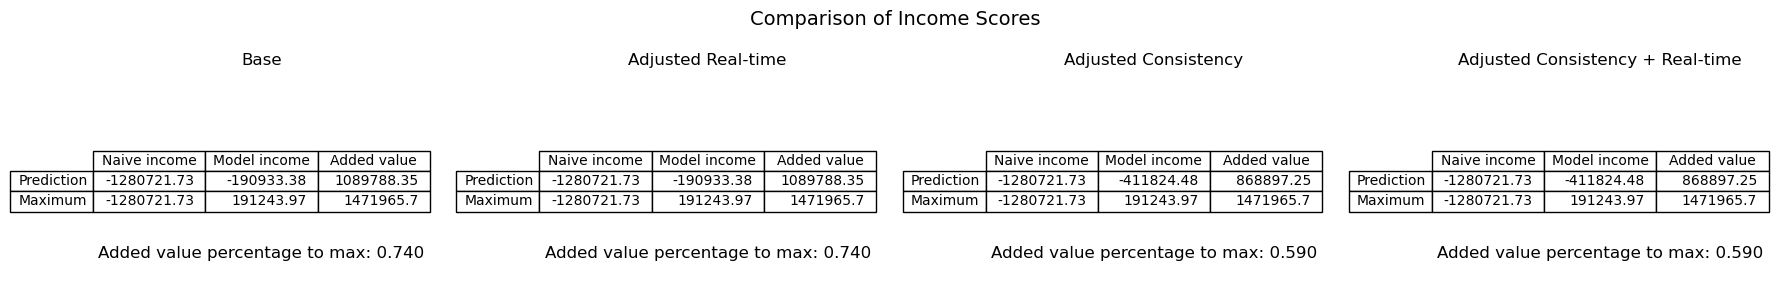

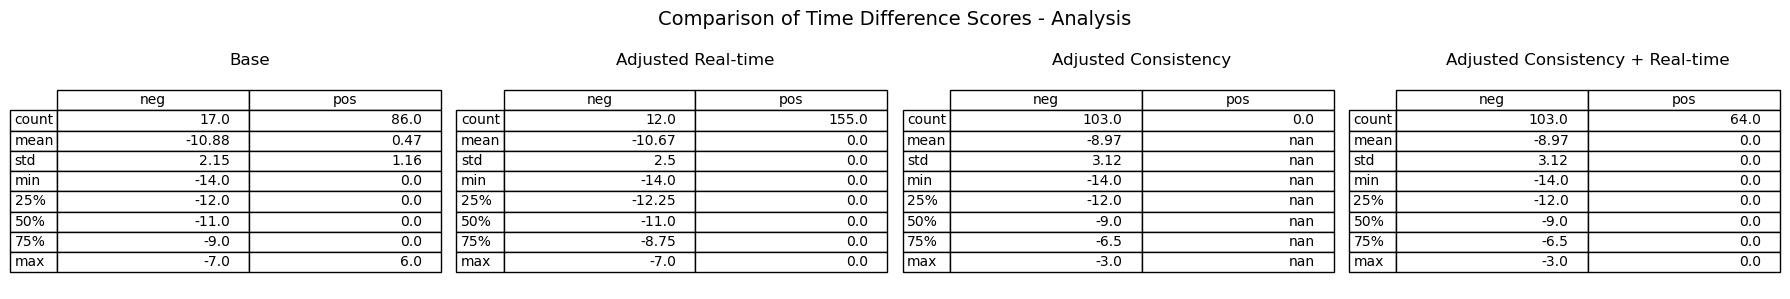

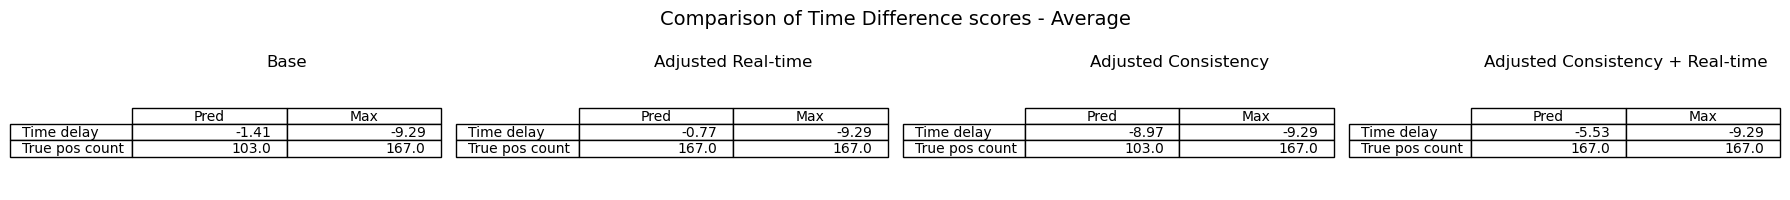

In [3]:
features = ['mid_price_published', 'minute_in_ptu', 'time_since_last_two_sided',
       'vwap_avg', 'PTU', 'forecast_demand', 'ptu_id', 'residual_load',
       'dispatch_diff', 'igcc_diff']
splits = get_splits(df, features, return_dict_pair=False)
# m = RandomForestClassifier(n_estimators=50)
# m = HistGradientBoostingRegressor(loss='poisson', l2_regularization=4)
m = HistGradientBoostingClassifier()
m.fit(splits['train'][0], splits['train'][1])
p = m.predict(splits['valid'][0])
# p = p > 0.5
p2 = recast_pred(p)
show_metrics_adjusted(splits['valid'][3], p2, version="fix")

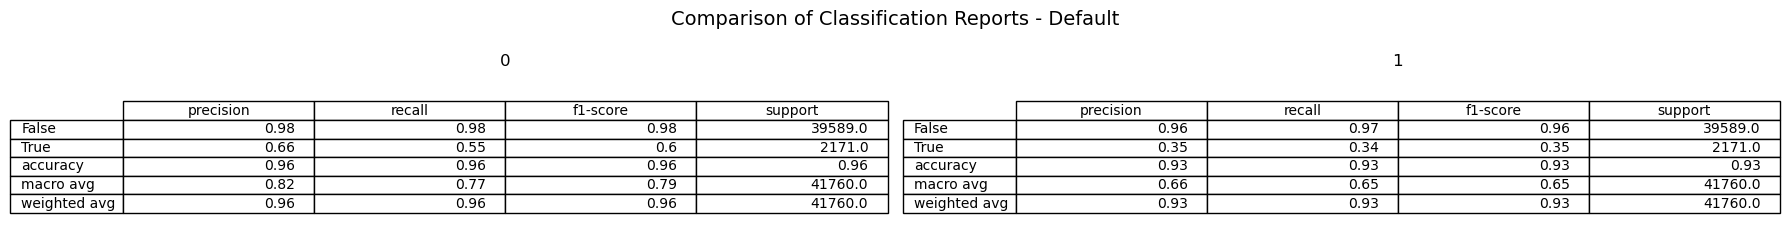

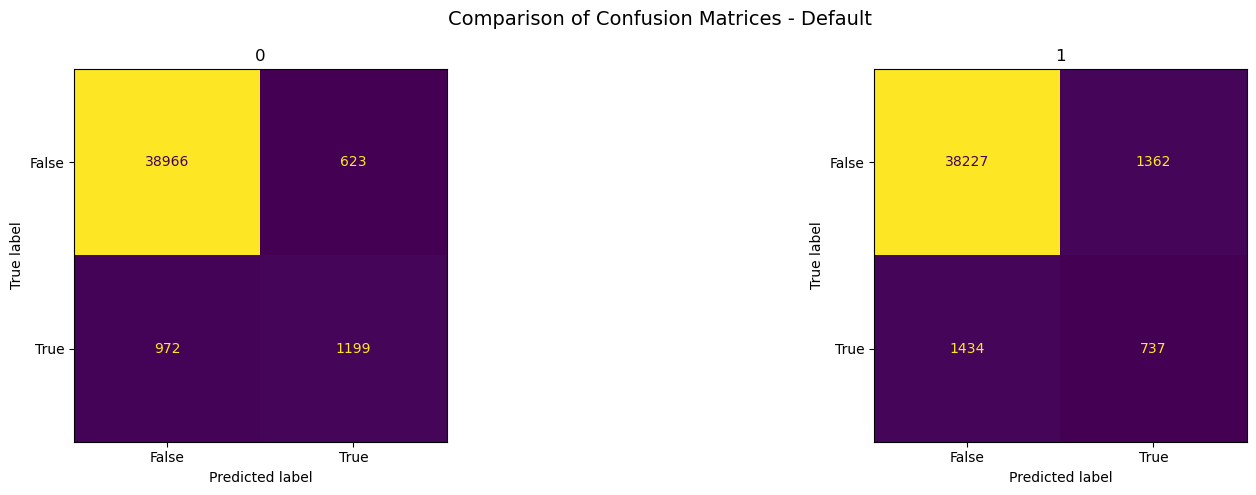

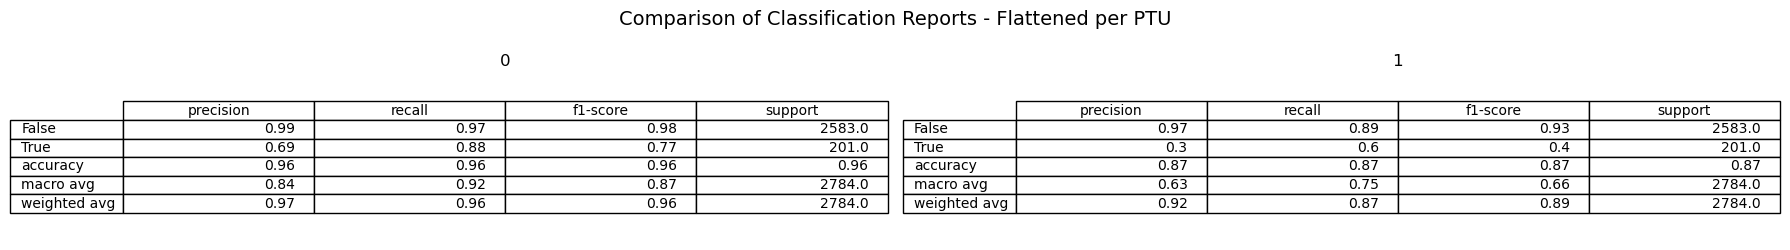

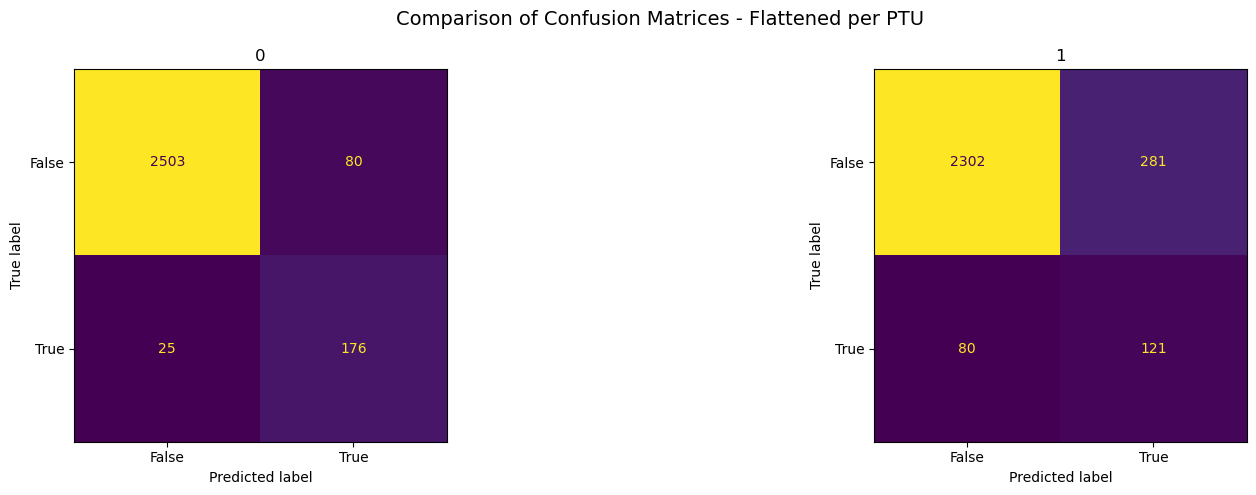

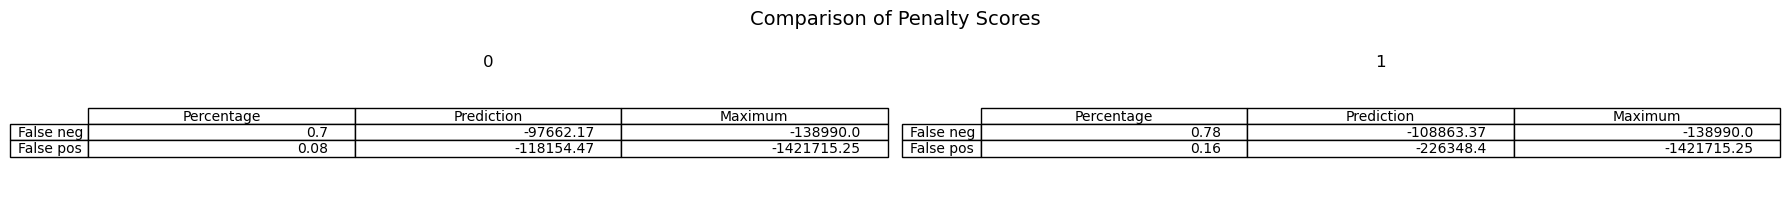

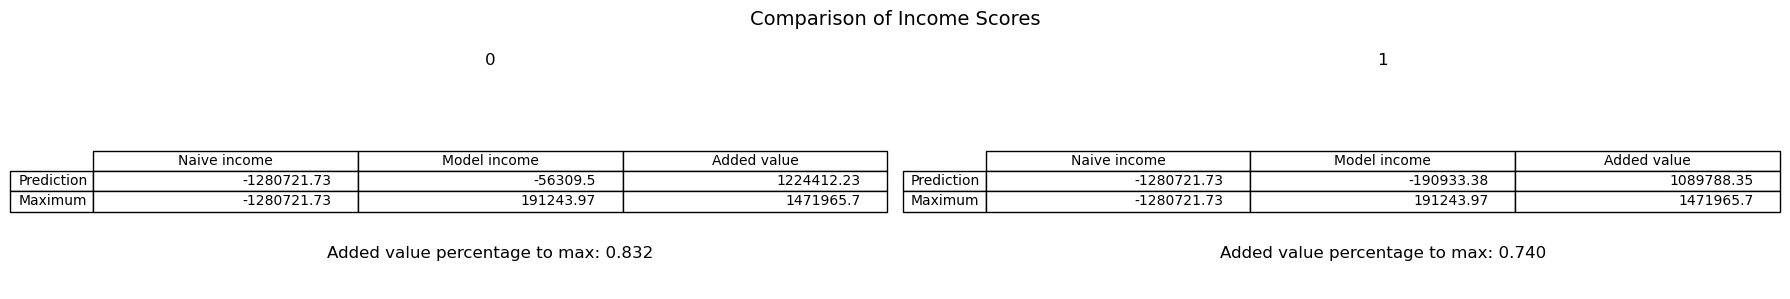

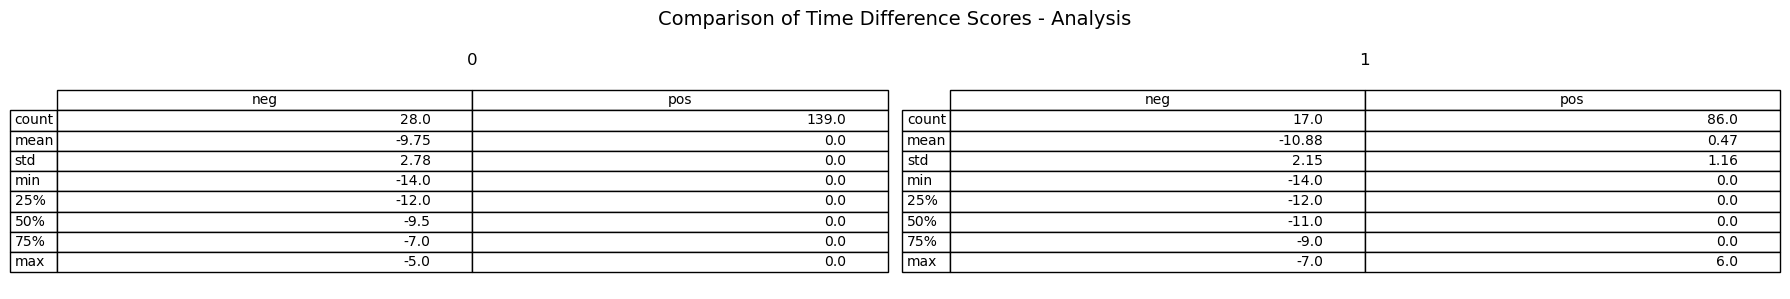

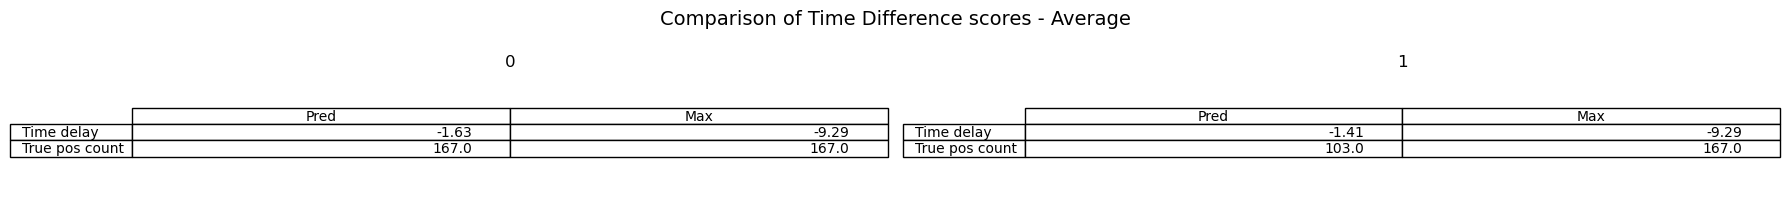

In [4]:
show_metrics_multi(splits['valid'][3], [p1, p2], version="fix")